# Data generator

This is a notebook with a simple script to generate random graph data one can use in the Power BI widget for testing purposes.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from faker import Faker
faker = Faker()
%matplotlib inline

## Erdos-Renyi random graph

/Users/swa/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


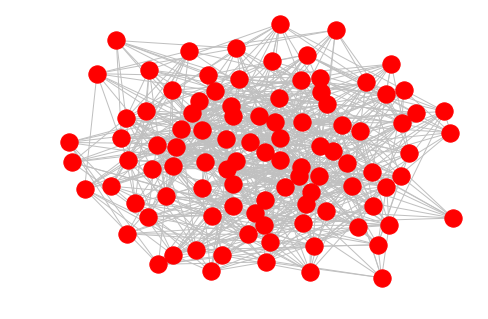

In [2]:
g = nx.erdos_renyi_graph(100, 0.15)
nx.draw(g, edge_color='silver')

## Random tree

/Users/swa/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


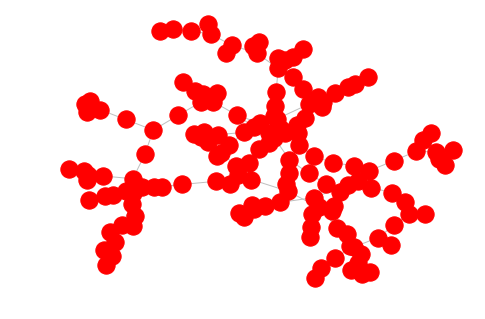

In [2]:
g = nx.random_tree(150)
nx.draw(g, edge_color='silver')

## Export to CSV

In [4]:
import csv
entityDic = {}

def ensureEntity(id):
    if id not in entityDic:
            shapeType = faker.random.choice(["ellipse", "rectangle", "round-rectangle"])
            entityDic[id] = {"country": faker.country(), "company": faker.company(), "type": shapeType}
    
# change the location that suits you
with open("~/tree.csv", "wt") as f:
    w = csv.writer(f)

    # Write CSV Header, If you dont need that, remove this line
    w.writerow(["FromId", "ToId", "CompanyName", "Country", "ShapeType", "Percentage", "Value1", "Value2", "Value3"])
    
    unusedIds = list(range(len(g.nodes)))
    for e in g.edges:
        
        if e[0] in unusedIds: unusedIds.remove(e[0])       
        ensureEntity(e[0])
        w.writerow([e[0],
                    e[1],
                    entityDic[e[0]]["company"],
                    entityDic[e[0]]["country"],
                    entityDic[e[0]]["type"],                    
                    faker.random.choice([20,30,40,44.5,50,60,74.1,80,90,100]),
                    faker.random_int(1,300),
                    faker.random.gauss(15, 5),
                    faker.random.gauss(100, 10)
                   ])
    for id in unusedIds:
        ensureEntity(id)
        w.writerow([id,
                    None,
                    entityDic[id]["company"],
                    entityDic[id]["country"],
                    entityDic[id]["type"],
                    faker.random.choice([20,30,40,44.5,50,60,74.1,80,90,100]),
                    faker.random_int(1,300),
                    faker.random.gauss(15, 5),
                    faker.random.gauss(100, 10)
                   ])

## Export to JSON

Note that the code below depends on the `ensureEntity` method above.

In [9]:
import json

unusedIds = list(range(len(g.nodes)))
data = []
for e in g.edges:
    if e[0] in unusedIds: unusedIds.remove(e[0])       
    ensureEntity(e[0])
    data.append(
        {
            "FromId": e[0], 
            "ToId": e[1],
            "CompanyName":  entityDic[e[0]]["company"],
            "Country": entityDic[e[0]]["country"],
            "CompanyType":  entityDic[e[0]]["type"],
            "Percentage": faker.random.choice([20,30,40,44.5,50,60,74.1,80,90,100])
        }
    )
   
for id in unusedIds:
    ensureEntity(id)
    data.append(
        {
            "FromId": id, 
            "ToId": None,
            "CompanyName":  entityDic[id]["company"],
            "Country": entityDic[id]["country"],
            "CompanyType":  entityDic[id]["type"],
            "Percentage": faker.random.choice([20,30,40,44.5,50,60,74.1,80,90,100])
        }
    )

with open('~/randomtree.json', 'w') as file:
    json.dump(data, file)